# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Network to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import seaborn as sns # for data visualization
import tensorflow as tf
import keras
import os
from tensorflow.keras.models import Sequential #sequential api for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
# Importing all the required sub-modules from Keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

* Libraries imported

## Loading the dataset

In [3]:
# Mounting the google drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Observed drive successfully mounted.

In [4]:
# Loading image data from path.
path_images = '/content/drive/MyDrive/Project 5/images.npy'
data_images = np.load(path_images)

* Images loaded successfully.

In [5]:
# Loading image data from path.
path_labels = '/content/drive/MyDrive/Project 5/Labels.csv'
data_labels = pd.read_csv(path_labels)
df_labels = data_labels.copy()

* Labels loaded successfully.

## Data Overview

In [6]:
# Checking the shape of the image array.
data_images.shape

(4750, 128, 128, 3)

* Observed that the data contains 4750 color images that are 128x128 pixels.

In [7]:
# Checking the shape of the label df.
df_labels.shape

(4750, 1)

* Observed that the data contains 4750 labels that correlate to the 4750 images.

In [8]:
# Viewing the top 5 rows of the data frame.
df_labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


* Observed first 5 rows of label data.

In [9]:
# Viewing the data type of the data frame
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


* Observed no null values present.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [10]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
          fig.tight_layout(pad=1.0)
  plt.show()

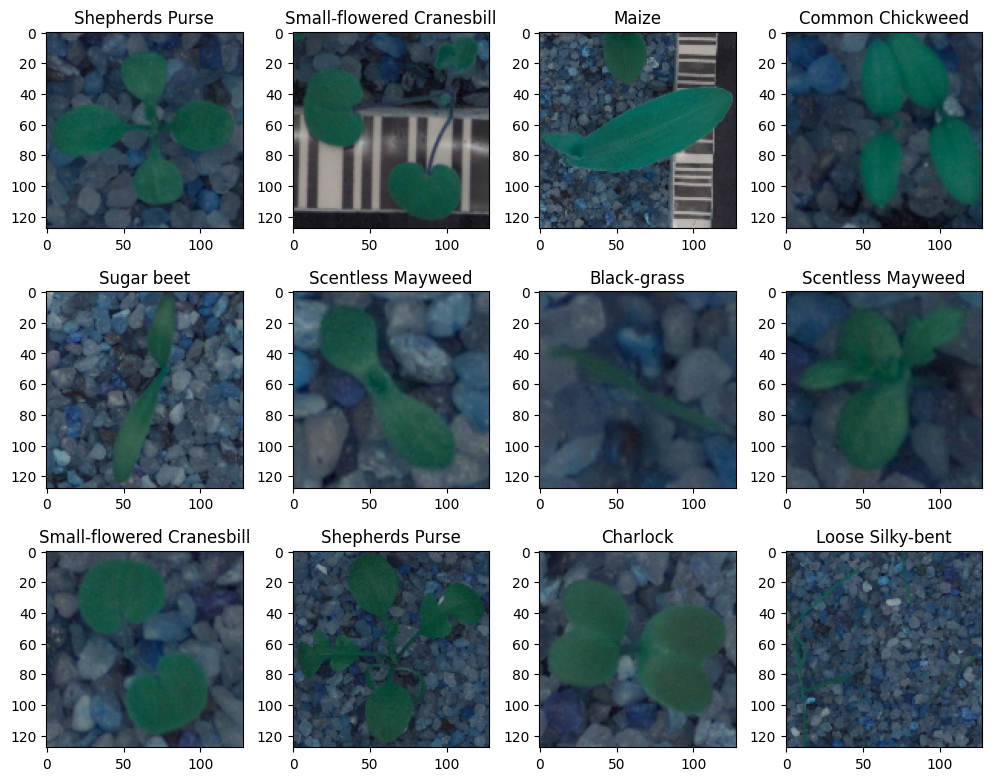

In [11]:
# Plotting images of different seedlings and their labels.
plot_images(data_images, df_labels)

In [12]:
# Printing numerical and percentage values of each seedling class.
count = df_labels.value_counts()
print(count)
print('-'*40)
count = df_labels.value_counts(normalize=True)
print(count)

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64
----------------------------------------
Label                    
Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Maize                        0.046526
Common wheat                 0.046526
dtype: float64


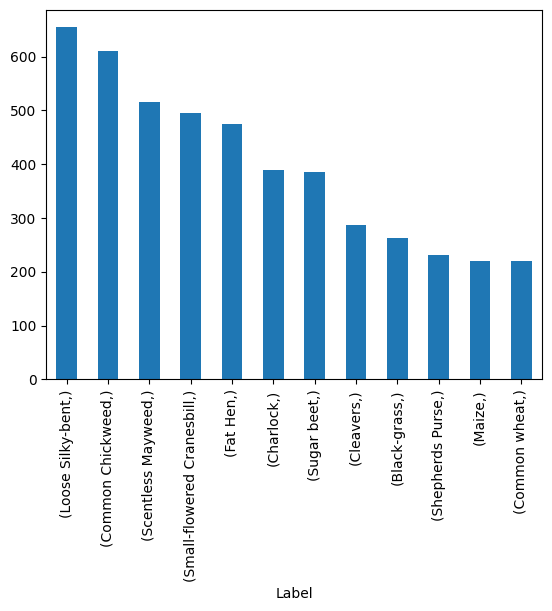

In [13]:
# Displaying bar chart with value counts of each seedling.
df_labels.value_counts().plot(kind='bar');

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [14]:
# Checking shape of data_images array
data_images.shape

(4750, 128, 128, 3)

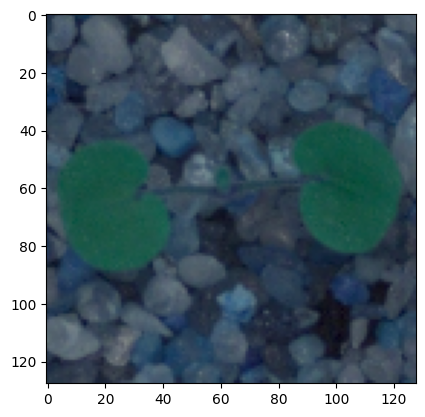

In [15]:
# Viewing and image from the array with plt.imshow().
plt.imshow(data_images[0])

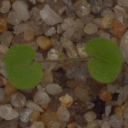

In [16]:
# Viewing and image from the array with cv2_imshow().
from google.colab.patches import cv2_imshow
cv2_imshow(data_images[0])

* Obeserved the difference in color channels.

In [17]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(data_images)):
  data_images[i] = cv2.cvtColor(data_images[i], cv2.COLOR_BGR2RGB)

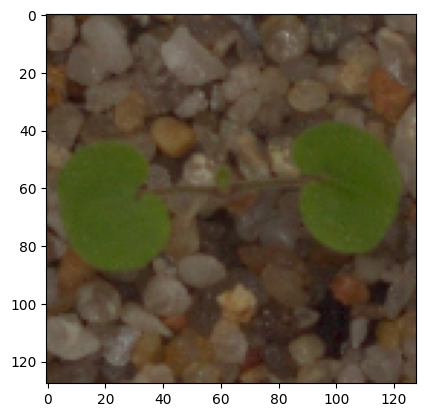

In [18]:
# Viewing and image from the array with plt.imshow() after changing color channels.
plt.imshow(data_images[0])

* Images are now stored in RGB

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [19]:
# Creating an empty list to add resized images to.
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
# Using for loop to resize all images in the range and appending them to the previously created list.
for i in range(len(data_images)):
  images_decreased.append( cv2.resize(data_images[i], dimensions, interpolation=cv2.INTER_LINEAR))

In [20]:
# Converting the list to a numpy array.
images_decreased = np.array(images_decreased)

In [21]:
# Viewing the shape of the newly created numpy array.
images_decreased.shape

(4750, 64, 64, 3)

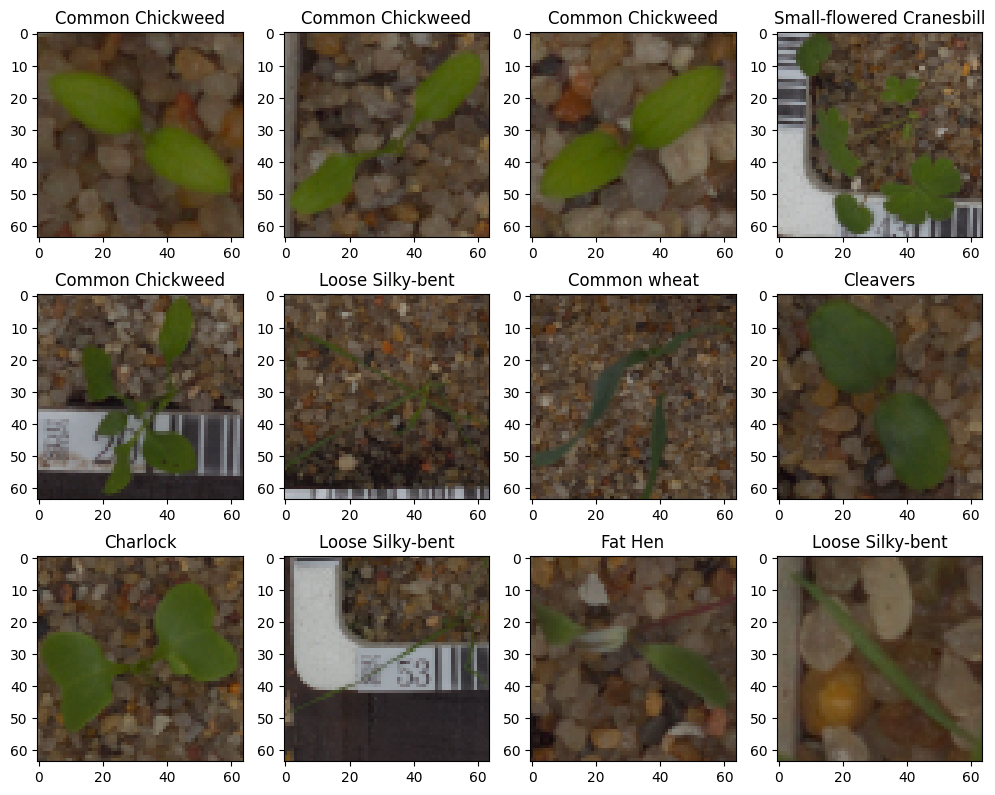

In [22]:
# Plotting some images and their labels from the data set.
plot_images(images_decreased, df_labels)

### Data Preparation for Modeling

In [23]:
# Splitting data into training/validation/test sets
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),df_labels , test_size=0.1, random_state=13,stratify=df_labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.2, random_state=13,stratify=y_temp)


In [24]:
# Printing the shape of the newly split data sets.
print("The shape of the training data: X, y:")
print(X_train.shape,",",y_train.shape)
print("-"*40)
print("The shape of the validation data: X, y:")
print(X_val.shape,",",y_val.shape)
print("-"*40)
print("The shape of the test data: X, y:")
print(X_test.shape,",",y_test.shape)

The shape of the training data: X, y:
(3420, 64, 64, 3) , (3420, 1)
----------------------------------------
The shape of the validation data: X, y:
(855, 64, 64, 3) , (855, 1)
----------------------------------------
The shape of the test data: X, y:
(475, 64, 64, 3) , (475, 1)


### Encode the target labels

In [25]:
# Encoding y data
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [26]:
# Printing the shape of the newly encoded y data sets
print("The shape of y_train_encoded:")
print(y_train_encoded.shape)
print("-"*30)
print("The shape of y_val_encoded:")
print(y_train_encoded.shape)
print("-"*30)
print("The shape of y_test_encoded:")
print(y_train_encoded.shape)

The shape of y_train_encoded:
(3420, 12)
------------------------------
The shape of y_val_encoded:
(3420, 12)
------------------------------
The shape of y_test_encoded:
(3420, 12)


* Observed shape of encoded y data.

### Data Normalization

In [27]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

### Model 1

In [28]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [29]:
# Fixing the seed for random number generators
import random
np.random.seed(13)
random.seed(13)
tf.random.set_seed(13)

In [30]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension seedling images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(100, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

In [31]:
# Creating early stopping conditions and checkpoints for fitting the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs
history = model.fit(X_train_normalized,
                    y_train_encoded,
                    validation_data=(X_val_normalized, y_val_encoded),
                    epochs=30,
                    batch_size=32,
                    callbacks=[es, mc]
                    )

Epoch 1/30
107/107 [==============================] - ETA: 0s - loss: 2.2152 - accuracy: 0.2351
Epoch 1: val_accuracy improved from -inf to 0.42105, saving model to best_model.h5
107/107 [==============================] - 7s 19ms/step - loss: 2.2152 - accuracy: 0.2351 - val_loss: 1.7276 - val_accuracy: 0.4211
Epoch 2/30
 18/107 [====>.........................] - ETA: 0s - loss: 1.6620 - accuracy: 0.4115

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


104/107 [============================>.] - ETA: 0s - loss: 1.6099 - accuracy: 0.4384
Epoch 2: val_accuracy improved from 0.42105 to 0.47836, saving model to best_model.h5
107/107 [==============================] - 1s 8ms/step - loss: 1.6028 - accuracy: 0.4401 - val_loss: 1.4579 - val_accuracy: 0.4784
Epoch 3/30
107/107 [==============================] - ETA: 0s - loss: 1.4061 - accuracy: 0.5026
Epoch 3: val_accuracy improved from 0.47836 to 0.52865, saving model to best_model.h5
107/107 [==============================] - 1s 8ms/step - loss: 1.4061 - accuracy: 0.5026 - val_loss: 1.2923 - val_accuracy: 0.5287
Epoch 4/30
102/107 [===========================>..] - ETA: 0s - loss: 1.1373 - accuracy: 0.6088
Epoch 4: val_accuracy improved from 0.52865 to 0.63158, saving model to best_model.h5
107/107 [==============================] - 1s 7ms/step - loss: 1.1304 - accuracy: 0.6117 - val_loss: 1.0633 - val_accuracy: 0.6316
Epoch 5/30
101/107 [===========================>..] - ETA: 0s - loss: 0.

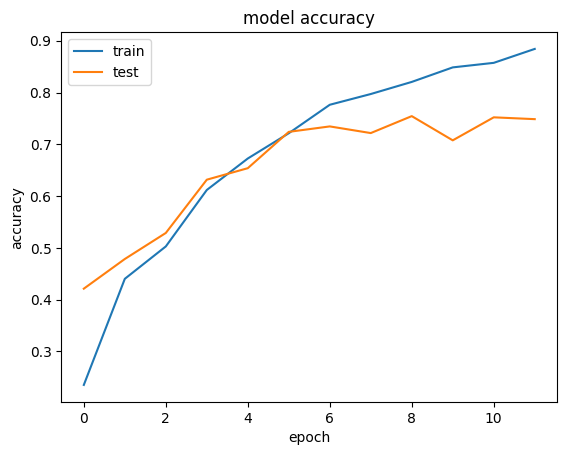

In [32]:
# Plotting learning curve of the model.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
# Evaluation model performance on test data.
model.evaluate(X_test_normalized,(y_test_encoded))

15/15 [==============================] - 0s 17ms/step - loss: 0.7977 - accuracy: 0.7600


[0.7976539731025696, 0.7599999904632568]

In [34]:
# Prediction and saving predictons on test data
y_test_pred_ln = model.predict(X_test_normalized)
y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=1)
normal_y_test = np.argmax(y_test_encoded, axis=1)

15/15 [==============================] - 0s 3ms/step


In [35]:
# Test Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score((normal_y_test), y_test_pred_classes_ln)

0.76

In [36]:
# Creating a list consisting of the labels from the y data for use in CMs
categories = np.unique(df_labels)

<Axes: >

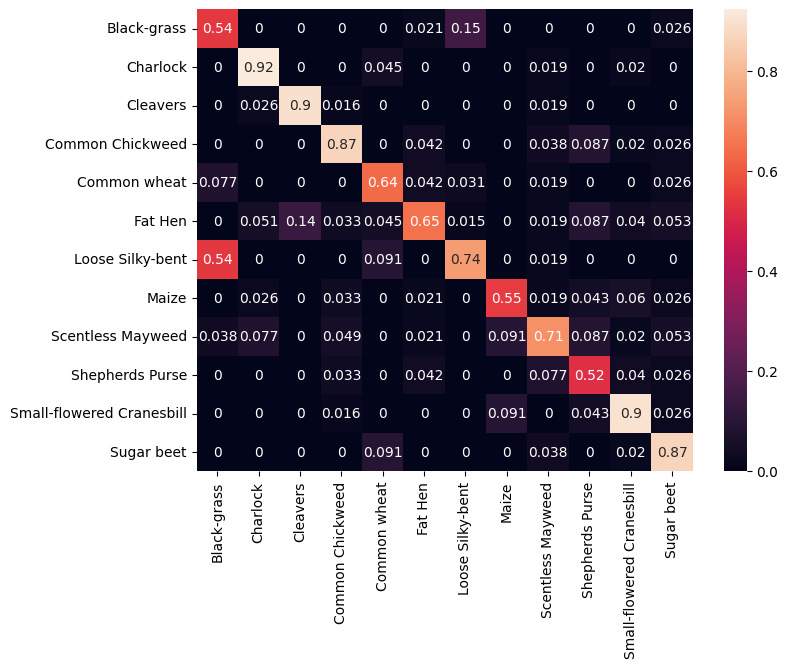

In [37]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln)

# Confusion matrix normalized per category true value
cf_matrix_n = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n, xticklabels=categories, yticklabels=categories, annot=True)

### Model 2 (model 1 fit with augmented data)

* In attempts to make up for the imbalanced data set, data augmentation is used to give additional variation to the training data.

In [38]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [39]:
# Fixing the seed for random number generators
import random
np.random.seed(13)
random.seed(13)
tf.random.set_seed(13)

In [40]:
# Augmenting image data to use refitting model 1
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )
val_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [41]:
# Fitting the seedling images to the image generator
train_datagen.fit(X_train_normalized)
val_datagen.fit(X_val_normalized)
test_datagen.fit(X_test_normalized)

In [42]:
# Creating early stopping conditions and checkpoints for fitting the model
es = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.0,
)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and using X_val_normalized for validation data
history1 = model.fit(train_datagen.flow(X_train_normalized,
                                       y_train_encoded,
                                       batch_size=20,
                                       seed=13,
                                       shuffle=False),
                    validation_data=(X_val_normalized, y_val_encoded),
                    epochs=30,
                    batch_size=32,
                    callbacks=[es, mc]
                    )

Epoch 1/30
170/171 [============================>.] - ETA: 0s - loss: 0.5965 - accuracy: 0.7994
Epoch 1: val_accuracy improved from -inf to 0.75673, saving model to best_model.h5
171/171 [==============================] - 7s 33ms/step - loss: 0.5946 - accuracy: 0.8006 - val_loss: 0.7638 - val_accuracy: 0.7567 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
171/171 [==============================] - ETA: 0s - loss: 0.5333 - accuracy: 0.8173
Epoch 2: val_accuracy did not improve from 0.75673
171/171 [==============================] - 6s 36ms/step - loss: 0.5333 - accuracy: 0.8173 - val_loss: 0.8111 - val_accuracy: 0.7275 - lr: 0.0010
Epoch 3/30
171/171 [==============================] - ETA: 0s - loss: 0.4715 - accuracy: 0.8360
Epoch 3: val_accuracy improved from 0.75673 to 0.76374, saving model to best_model.h5
171/171 [==============================] - 4s 26ms/step - loss: 0.4715 - accuracy: 0.8360 - val_loss: 0.7397 - val_accuracy: 0.7637 - lr: 0.0010
Epoch 4/30
171/171 [==============================] - ETA: 0s - loss: 0.4548 - accuracy: 0.8421
Epoch 4: val_accuracy improved from 0.76374 to 0.78012, saving model to best_model.h5
171/171 [==============================] - 6s 34ms/step - loss: 0.4548 - accuracy: 0.8421 - val_loss: 0.7459 - val_accuracy: 0.7801 - lr: 0.0010
Epoch 5/30
171/171 [==============================] - 

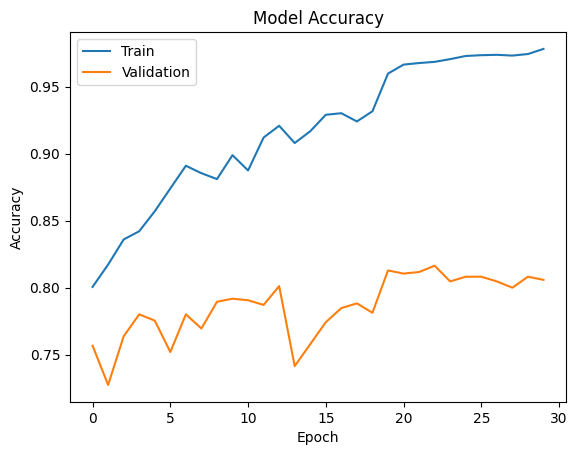

In [43]:
# Plotting learning curve of the model.
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
# Evaluating the model on test data.
model.evaluate(X_test_normalized,(y_test_encoded))

15/15 [==============================] - 0s 4ms/step - loss: 0.8979 - accuracy: 0.8084


[0.8979220986366272, 0.8084210753440857]

In [45]:
# Prediction and saving predictons on test data
y_test_pred_ln1 = model.predict(X_test_normalized)
y_test_pred_classes_ln1 = np.argmax(y_test_pred_ln1, axis=1)
normal_y_test = np.argmax(y_test_encoded, axis=1)

15/15 [==============================] - 0s 3ms/step


In [46]:
# Test Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score((normal_y_test), y_test_pred_classes_ln1)

0.8084210526315789

<Axes: >

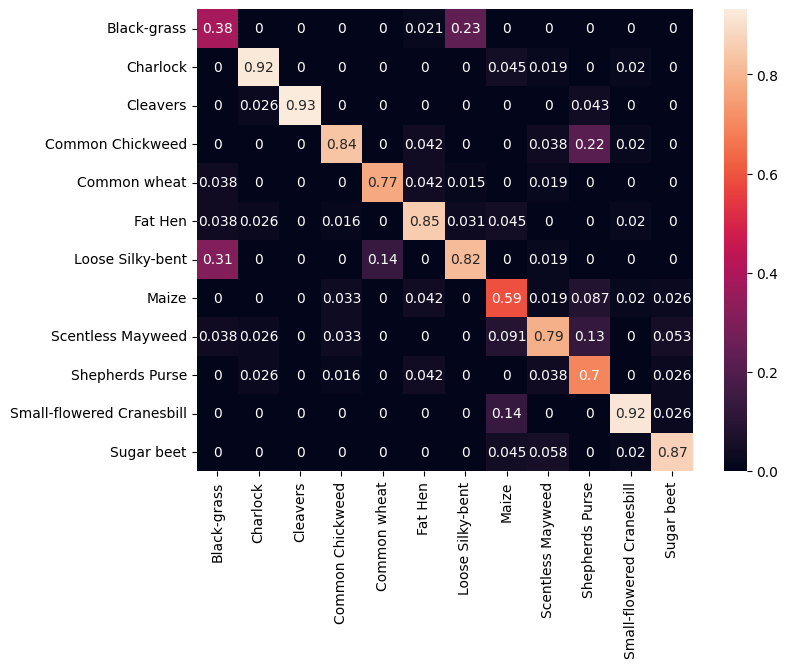

In [47]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln1)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=categories, yticklabels=categories, annot=True)

* The model's performance was increased by using data augmentation on the training data.
* The validation and test data was not modified.

### Model 3 - using transfer learning

* Model 3 is being built using the VGG16 model's conv and pooling layers.
* The weights used are those from imagenet.

In [48]:
# Importing VGG16 model to use in transfer learning
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [49]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [50]:
# Checking that all layers from the VGG model are not trainable
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [51]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [52]:
# Initializing the model
model_t = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_t.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_t.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_t.add(Dense(100, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_t.add(Dense(12, activation='softmax'))

In [53]:
# Compiling the model
model_t.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of the model
model_t.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 100)               204900    
                                                                 
 dense_1 (Dense)             (None, 12)                1212      
                                                                 
Total params: 14920800 (56.92 MB)
Trainable params: 206112 (805.12 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [54]:
# Creating early stopping conditions and checkpoints for fitting the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fitting the VGG model with augmented data
model_t_history = model_t.fit(train_datagen.flow(X_train_normalized,
                                                      y_train_encoded,
                                                      batch_size=20,
                                                      seed=13,
                                                      shuffle=False),
                                  validation_data = (X_val_normalized, y_val_encoded),
                                  epochs=100,
                                  callbacks=[es, mc],
                                  use_multiprocessing=True)

Epoch 1/100
171/171 [==============================] - ETA: 0s - loss: 1.9486 - accuracy: 0.3392
Epoch 1: val_accuracy improved from -inf to 0.44327, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


171/171 [==============================] - 15s 76ms/step - loss: 1.9486 - accuracy: 0.3392 - val_loss: 1.6168 - val_accuracy: 0.4433
Epoch 2/100
171/171 [==============================] - ETA: 0s - loss: 1.5245 - accuracy: 0.4801
Epoch 2: val_accuracy improved from 0.44327 to 0.51696, saving model to best_model.h5
171/171 [==============================] - 12s 69ms/step - loss: 1.5245 - accuracy: 0.4801 - val_loss: 1.4098 - val_accuracy: 0.5170
Epoch 3/100
171/171 [==============================] - ETA: 0s - loss: 1.3339 - accuracy: 0.5436
Epoch 3: val_accuracy improved from 0.51696 to 0.52632, saving model to best_model.h5
171/171 [==============================] - 12s 72ms/step - loss: 1.3339 - accuracy: 0.5436 - val_loss: 1.4372 - val_accuracy: 0.5263
Epoch 4/100
170/171 [============================>.] - ETA: 0s - loss: 1.2498 - accuracy: 0.5691
Epoch 4: val_accuracy improved from 0.52632 to 0.55088, saving model to best_model.h5
171/171 [==============================] - 12s 67ms/

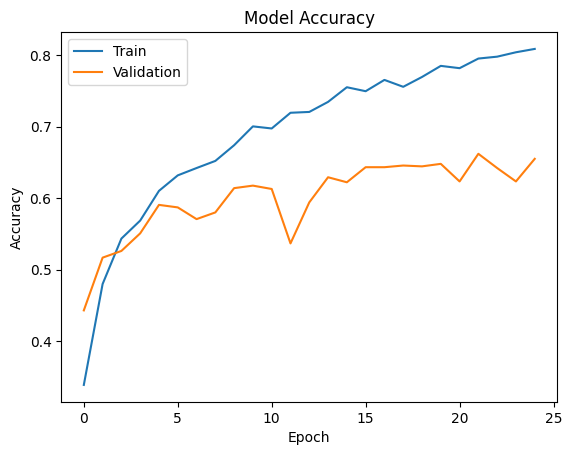

In [55]:
# Plotting learning curve of the model.
plt.plot(model_t_history.history['accuracy'])
plt.plot(model_t_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [56]:
# Evaluating the model on test data.
model_t.evaluate(X_test_normalized,(y_test_encoded))

15/15 [==============================] - 1s 78ms/step - loss: 1.2112 - accuracy: 0.6526


[1.211215853691101, 0.6526315808296204]

In [57]:
# Prediction and saving predictons on test data
y_test_pred_ln2 = model_t.predict(X_test_normalized)
y_test_pred_classes_ln2 = np.argmax(y_test_pred_ln2, axis=1)
normal_y_test = np.argmax(y_test_encoded, axis=1)

15/15 [==============================] - 0s 13ms/step


In [58]:
# Test Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score((normal_y_test), y_test_pred_classes_ln2)

0.6526315789473685

<Axes: >

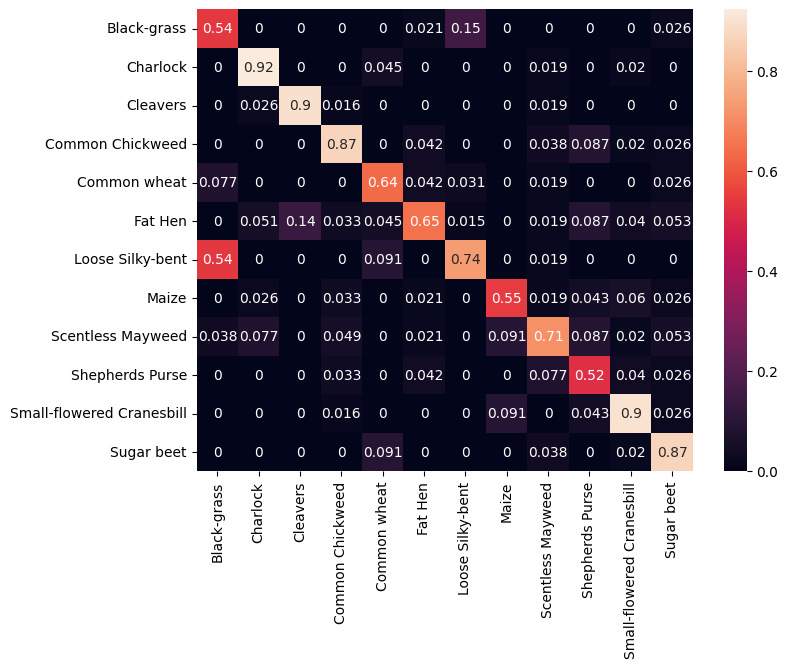

In [59]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln)

# Confusion matrix normalized per category true value
cf_matrix_n2 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n2, xticklabels=categories, yticklabels=categories, annot=True)

* Performance is much worse than model 2.
* VGG16's conv and pooling layers are potentially looking for more complex features than those present in the seedling images.

### Model 4 - using transfer learning

* This model is similar to model 3 except the only layers used from the VGG16 model are the layers up to the block4_pool layer.
* This was done to check if the VGG16's conv and pooling layers are looking for too complex of features to be useful in classifing the seedlings.

In [61]:
# Getting the conv/pooling layers from the vgg_model, but only the layers up to and including block4_pool
transfer_layer = vgg_model.get_layer('block4_pool')
vgg_model_p = Model(inputs=vgg_model.input, outputs=transfer_layer.output)

In [62]:
# Viewing summary of the partial VGG16 model
vgg_model_p.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [63]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model_p.layers:
    layer.trainable = False

In [64]:
# Displaying if layers are traniable or not
for layer in vgg_model_p.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False


In [65]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(13)
import random
random.seed(13)
tf.random.set_seed(13)

In [66]:
# Initializing the model
model_t_p = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_t_p.add(vgg_model_p)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_t_p.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_t_p.add(Dense(100, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_t_p.add(Dense(12, activation='softmax'))


In [67]:
# Compiling the model
model_t_p.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of the model
model_t_p.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 4, 4, 512)         7635264   
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 100)               819300    
                                                                 
 dense_1 (Dense)             (None, 12)                1212      
                                                                 
Total params: 8455776 (32.26 MB)
Trainable params: 820512 (3.13 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [68]:
# Creating early stopping conditions and checkpoints for fitting the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

## Fitting the VGG model
model_t_p_history = model_t_p.fit(train_datagen.flow(X_train_normalized,
                                                      y_train_encoded,
                                                      batch_size=20,
                                                      seed=13,
                                                      shuffle=False),
                                  validation_data = (X_val_normalized, y_val_encoded),
                                  epochs=100,
                                  callbacks=[es, mc],
                                  use_multiprocessing=True)

Epoch 1/100
171/171 [==============================] - ETA: 0s - loss: 2.2933 - accuracy: 0.3164
Epoch 1: val_accuracy improved from -inf to 0.41871, saving model to best_model.h5
171/171 [==============================] - 12s 62ms/step - loss: 2.2933 - accuracy: 0.3164 - val_loss: 1.6696 - val_accuracy: 0.4187


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/100
170/171 [============================>.] - ETA: 0s - loss: 1.5485 - accuracy: 0.4576
Epoch 2: val_accuracy improved from 0.41871 to 0.51345, saving model to best_model.h5
171/171 [==============================] - 12s 70ms/step - loss: 1.5511 - accuracy: 0.4570 - val_loss: 1.3774 - val_accuracy: 0.5135
Epoch 3/100
171/171 [==============================] - ETA: 0s - loss: 1.3129 - accuracy: 0.5278
Epoch 3: val_accuracy improved from 0.51345 to 0.53801, saving model to best_model.h5
171/171 [==============================] - 11s 65ms/step - loss: 1.3129 - accuracy: 0.5278 - val_loss: 1.2832 - val_accuracy: 0.5380
Epoch 4/100
171/171 [==============================] - ETA: 0s - loss: 1.1510 - accuracy: 0.5980
Epoch 4: val_accuracy improved from 0.53801 to 0.56140, saving model to best_model.h5
171/171 [==============================] - 12s 67ms/step - loss: 1.1510 - accuracy: 0.5980 - val_loss: 1.2551 - val_accuracy: 0.5614
Epoch 5/100
171/171 [==============================]

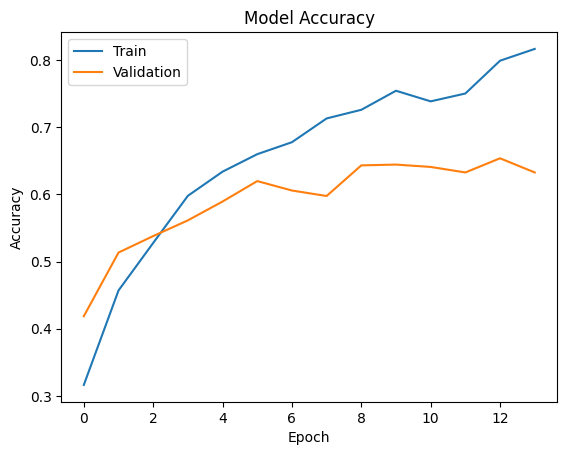

In [69]:
# Plotting the learning curve of the model.
plt.plot(model_t_p_history.history['accuracy'])
plt.plot(model_t_p_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [70]:
# Evaluation the model on test data.
model_t_p.evaluate(X_test_normalized,(y_test_encoded))

15/15 [==============================] - 0s 12ms/step - loss: 1.0487 - accuracy: 0.6800


[1.0486868619918823, 0.6800000071525574]

In [71]:
# Prediction and saving predictons on test data
y_test_pred_ln_p = model_t_p.predict(X_test_normalized)
y_test_pred_classes_ln_p = np.argmax(y_test_pred_ln_p, axis=1)
normal_y_test = np.argmax(y_test_encoded, axis=1)

15/15 [==============================] - 0s 10ms/step


In [72]:
# Test Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score((normal_y_test), y_test_pred_classes_ln_p)

0.68

<Axes: >

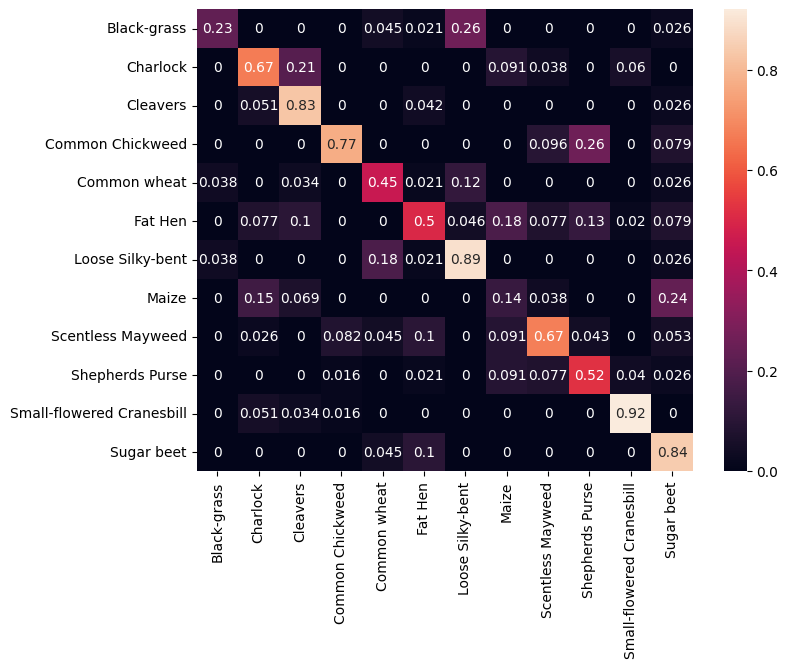

In [73]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln_p)

# Confusion matrix normalized per category true value
cf_matrix_n_p = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n_p, xticklabels=categories, yticklabels=categories, annot=True)

* Performance has increased from model 2, but the accuracy is still much lower than that of model 2.
* It appears the VGG16 model does not perform well on seedling image data.

### Model 5 (revision of model 2)

* Since model 2 has had the best performance so far, I will attempt to improve upon this model further.

In [74]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [75]:
# Fixing the seed for random number generators
import random
np.random.seed(13)
random.seed(13)
tf.random.set_seed(13)

In [76]:
# Intializing a sequential model
model5 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model5.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64,64,3)))

# Adding max pooling to reduce the size of output of first conv layer
model5.add(MaxPooling2D((2, 2), padding = 'same'))

model5.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model5.add(MaxPooling2D((2, 2), padding = 'same'))
model5.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model5.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model5.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model5.add(Dense(100, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dense(32, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model5.add(Dense(12, activation='softmax'))

In [77]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

In [78]:
# Creating early stopping conditions and checkpoints for fitting the model
es = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.0,
)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 10%
history5 = model5.fit(train_datagen.flow(X_train_normalized,
                                                      y_train_encoded,
                                                      batch_size=20,
                                                      seed=13,
                                                      shuffle=False),
                                  validation_data = (X_val_normalized, y_val_encoded),
                                  epochs=30,
                                  callbacks=[es, mc],
                                  use_multiprocessing=True
                    )

Epoch 1/30
171/171 [==============================] - ETA: 0s - loss: 1.8999 - accuracy: 0.3564
Epoch 1: val_accuracy improved from -inf to 0.19064, saving model to best_model.h5
171/171 [==============================] - 13s 59ms/step - loss: 1.8999 - accuracy: 0.3564 - val_loss: 2.3049 - val_accuracy: 0.1906 - lr: 0.0010
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


171/171 [==============================] - ETA: 0s - loss: 1.2080 - accuracy: 0.5965
Epoch 2: val_accuracy improved from 0.19064 to 0.35906, saving model to best_model.h5
171/171 [==============================] - 11s 67ms/step - loss: 1.2080 - accuracy: 0.5965 - val_loss: 2.1617 - val_accuracy: 0.3591 - lr: 0.0010
Epoch 3/30
171/171 [==============================] - ETA: 0s - loss: 0.9585 - accuracy: 0.6810
Epoch 3: val_accuracy improved from 0.35906 to 0.41871, saving model to best_model.h5
171/171 [==============================] - 12s 67ms/step - loss: 0.9585 - accuracy: 0.6810 - val_loss: 3.2146 - val_accuracy: 0.4187 - lr: 0.0010
Epoch 4/30
171/171 [==============================] - ETA: 0s - loss: 0.8009 - accuracy: 0.7272
Epoch 4: val_accuracy did not improve from 0.41871
171/171 [==============================] - 12s 69ms/step - loss: 0.8009 - accuracy: 0.7272 - val_loss: 3.1577 - val_accuracy: 0.3310 - lr: 0.0010
Epoch 5/30
171/171 [==============================] - ETA: 0s 

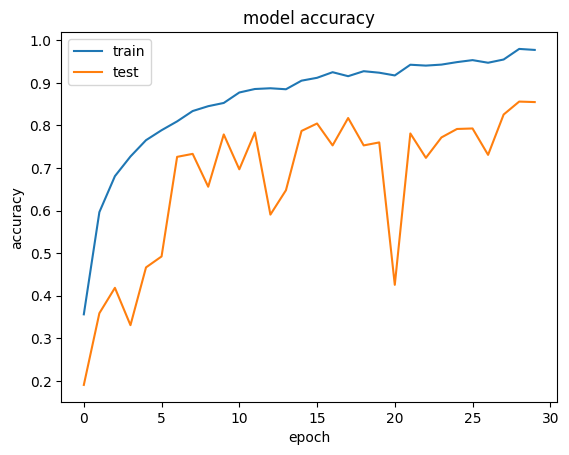

In [79]:
# Plotting the learning curve of the model.
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
# Evaluating the model on test data
model5.evaluate(X_test_normalized,(y_test_encoded))

15/15 [==============================] - 0s 5ms/step - loss: 0.5203 - accuracy: 0.8611


[0.5202826857566833, 0.8610526323318481]

In [81]:
# Prediction and saving predictons on test data
y_test_pred_ln3 = model5.predict(X_test_normalized)
y_test_pred_classes_ln3 = np.argmax(y_test_pred_ln3, axis=1)
normal_y_test = np.argmax(y_test_encoded, axis=1)

15/15 [==============================] - 0s 3ms/step


In [82]:
# Test Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score((normal_y_test), y_test_pred_classes_ln3)

0.8610526315789474

<Axes: >

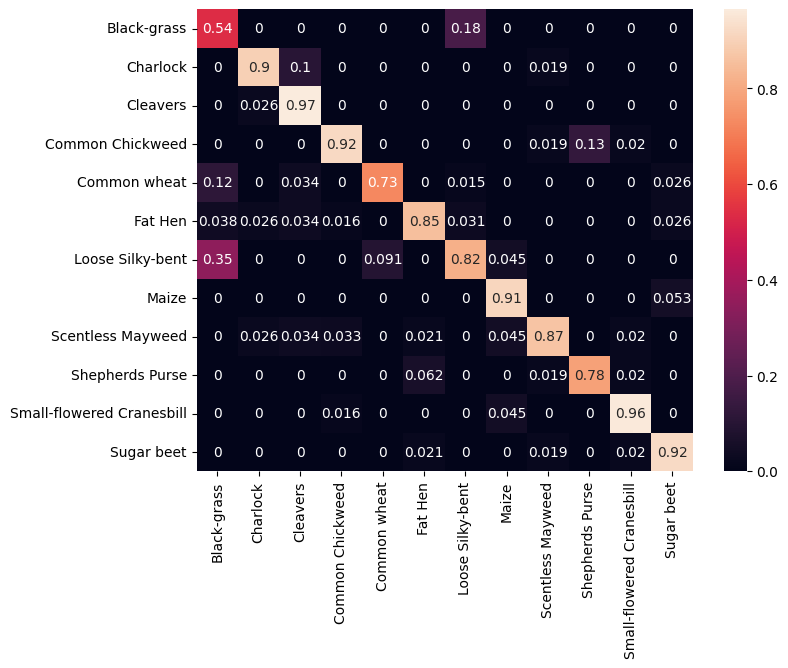

In [83]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln3)

# Confusion matrix normalized per category true value
cf_matrix_n3 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n3, xticklabels=categories, yticklabels=categories, annot=True)

* Performance on this iteration is the performing better than

## Comparing and choosing best model

* Model performance metrics are listed for each model trained.
* The models are being compred by looking at the weighted avg of the f1-score.
* This is going to maximize correct predictions for all classes.

### Model 1

In [84]:
# Printing classification report for model 1.
from sklearn.metrics import classification_report
print(classification_report((normal_y_test), y_test_pred_classes_ln))

              precision    recall  f1-score   support

           0       0.45      0.54      0.49        26
           1       0.84      0.92      0.88        39
           2       0.87      0.90      0.88        29
           3       0.83      0.87      0.85        61
           4       0.70      0.64      0.67        22
           5       0.78      0.65      0.70        48
           6       0.79      0.74      0.76        65
           7       0.75      0.55      0.63        22
           8       0.73      0.71      0.72        52
           9       0.60      0.52      0.56        23
          10       0.80      0.90      0.85        50
          11       0.77      0.87      0.81        38

    accuracy                           0.76       475
   macro avg       0.74      0.73      0.73       475
weighted avg       0.76      0.76      0.76       475



### Model 2

In [85]:
# Printing classification report for model 2.
from sklearn.metrics import classification_report
print(classification_report((normal_y_test), y_test_pred_classes_ln1))

              precision    recall  f1-score   support

           0       0.48      0.38      0.43        26
           1       0.90      0.92      0.91        39
           2       1.00      0.93      0.96        29
           3       0.89      0.84      0.86        61
           4       0.85      0.77      0.81        22
           5       0.82      0.85      0.84        48
           6       0.75      0.82      0.78        65
           7       0.62      0.59      0.60        22
           8       0.79      0.79      0.79        52
           9       0.59      0.70      0.64        23
          10       0.90      0.92      0.91        50
          11       0.87      0.87      0.87        38

    accuracy                           0.81       475
   macro avg       0.79      0.78      0.78       475
weighted avg       0.81      0.81      0.81       475



### Model 3

In [86]:
# Printing classification report for model 3.
from sklearn.metrics import classification_report
print(classification_report((normal_y_test), y_test_pred_classes_ln2))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        26
           1       0.55      0.77      0.64        39
           2       0.72      0.72      0.72        29
           3       0.75      0.77      0.76        61
           4       0.85      0.50      0.63        22
           5       0.58      0.31      0.41        48
           6       0.74      0.89      0.81        65
           7       0.58      0.64      0.61        22
           8       0.73      0.63      0.68        52
           9       0.27      0.35      0.30        23
          10       0.76      0.74      0.75        50
          11       0.57      0.55      0.56        38

    accuracy                           0.65       475
   macro avg       0.64      0.62      0.62       475
weighted avg       0.66      0.65      0.65       475



### Model 4

In [87]:
# Printing classification report for model 4.
from sklearn.metrics import classification_report
print(classification_report((normal_y_test), y_test_pred_classes_ln_p))

              precision    recall  f1-score   support

           0       0.75      0.23      0.35        26
           1       0.65      0.67      0.66        39
           2       0.65      0.83      0.73        29
           3       0.87      0.77      0.82        61
           4       0.59      0.45      0.51        22
           5       0.60      0.50      0.55        48
           6       0.67      0.89      0.77        65
           7       0.23      0.14      0.17        22
           8       0.67      0.67      0.67        52
           9       0.55      0.52      0.53        23
          10       0.88      0.92      0.90        50
          11       0.59      0.84      0.70        38

    accuracy                           0.68       475
   macro avg       0.64      0.62      0.61       475
weighted avg       0.68      0.68      0.66       475



### Model 5

In [88]:
# Printing classification report for model 5.
from sklearn.metrics import classification_report
print(classification_report((normal_y_test), y_test_pred_classes_ln3))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53        26
           1       0.92      0.90      0.91        39
           2       0.82      0.97      0.89        29
           3       0.93      0.92      0.93        61
           4       0.89      0.73      0.80        22
           5       0.89      0.85      0.87        48
           6       0.78      0.82      0.80        65
           7       0.87      0.91      0.89        22
           8       0.92      0.87      0.89        52
           9       0.86      0.78      0.82        23
          10       0.92      0.96      0.94        50
          11       0.90      0.92      0.91        38

    accuracy                           0.86       475
   macro avg       0.85      0.85      0.85       475
weighted avg       0.86      0.86      0.86       475



## Final Model

**Summary**
* The most significant factors of model performance appear to be in the convolution/pooling layers and the use of data augmentation.
* Additional training images will improve model performance, especially on minority classes such as black-grass and maize.
* Fitting model 1 with augmented data increased model performance.
* Transfer learning with VGG16 does not out perform model 2 or even model 1.
* Taking less conv/pooling layers from VGG16 did improve model 3, but model 2 was still performing the best by a good margin.
* Because model 2 was performing so well, it was picked to be the base of model 5, with slight alterations being made in the fully connected layers.
* These alterations futher increased model perfomance, making model 5 the best performing model.
* All classes are being categorized correctly more than 75% of the time, except for black-grass.
* The final model is correctly categorizing seedlings 86% of the time.


In [89]:
# Renaming best model to final_model
final_model = model5

### Visualizing the prediction

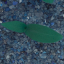

In [90]:
# Plotting the test image
# n is a random integer corresponding to indicies of the test set
n = random.randint(0, len(X_test))
cv2_imshow(X_test[n])

In [91]:
# Predicting the test image with the best model and storing the prediction value in res variable
res=final_model.predict(X_test[n].reshape(1,64,64,3))

1/1 [==============================] - 0s 404ms/step


In [92]:
# Applying argmax on the prediction to get the highest index value
i=np.argmax(res)
print('The model has predicted the image to be a {}.'.format(categories[i]))
print('The image is labeled as a {}.'.format(y_test.iloc[n,0]))
if categories[i]==y_test.iloc[n,0]:
    print('The model has successfully categorized the image.')
else:
    print('The model has not successfully categorized the image.')

The model has predicted the image to be a Maize.
The image is labeled as a Maize.
The model has successfully categorized the image.


## Actionable Insights and Business Recommendations

* Black-grass is least likely to be correctly categorized by the final model and is only being predicted correctly about 62% of the time.
* Images provided of black-grass do not have many features to detect because of the simplicty of this seedling.
* If possible, try other methods of photographing black-grass, such as taking the pictures later in the seedlings growth.
* Training the model with additional images of these plant seedlings is needed to increase the model's performance categorizing minority classes such as black-grass and common wheat.
* Determine a threshold of model confidence under which, the images will be flagged for manual verification to ensure seedlings are correctly categorized.




_____